# Table of Contents

- Importing our Libraries
- Importing our Data
- initial baseline model
- initial data cleaning
- numerical data
    - tests
        - simple and multi-linear regressions
        - scaling
        - logging data
        - polynomials
    - conclusions
- categorical data
    - tests
        - condition
        - nuisance
        - heat
        - grade
    - conclusions
- final results

# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# from random import sample
from itertools import combinations
# from statsmodels.stats.power import TTestIndPower, TTestPower
# import math
import seaborn as sns
# import scipy as sp
import pandas as pd
# from matplotlib.lines import Line2D
# import random
import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from statsmodels.stats.stattools import jarque_bera
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

import num_model_all_combos as simple_test

`num_model_all_codes` is a custom module located in a .py file within this notebook. This module is needed for the notebook to run.

# Importing our Data

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum().sum()

46

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Our original dataset had 25 features describing 30,155 rows of housing sets. There were 46 rows with null data that were dropped during the cleaning process, leaving us with 30,111 rows of housing set data to use for our model.

Of the 25 features, dtypes included: 10 object, 10 int, and 5 float. We further explain and reduce the features below.

# Initial Baseline Model

To get an initial understanding of our data, we are building a baseline model based on the feature `sqft_living` since it has the highest correlation to our target feature: `price`.

In [9]:
# Checking correlation to price
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [10]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:07:48   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our first simple-linear regression model has an R-squared value of .37. This model represents only 37% of the variance found in housing prices. Our model is statistically significant with an F-statistic p-value less than our alpha of 0.05. The constant coefficient and predictor variable coefficient are also statistically significant when compared to our alpha.

# Initial Data Cleaning

## Dropping Outliers in our Target

We modeled the target data to check its shape and to determine whether there were outliers that could be affecting our data. After looking at histograms and box plots of `price`, it was decided to remove any values above or below three standard deviations of the mean. This small adjustment allowed us to clean the dataset while only removing .6% of the data. 

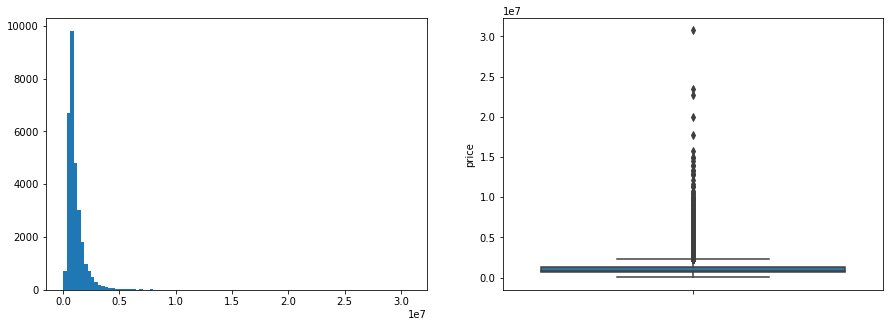

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [12]:
# Dropping outliers to within 3 standard deviations
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

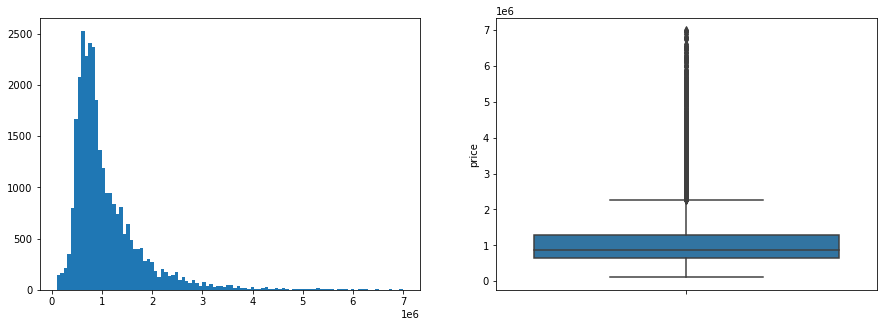

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [14]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


## Dropping Features that do not Pertain to the Business Question

These columns are not relevant for a variety of reasons:

- Drop ID: just a unique identifier, no helpful information
- Drop adress and lat/long: Location not important in this analysis
- Drop year renovated and year built: not relevant for remodeling purposes
- Drop date: last sale date is not relevant to remodeling home
- Drop sq ft lot: Cannot change lot size by remodeling home
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view
- Sewer System: not likely to change your entire sewer system during a home remodel

In [15]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 
                                  'date', 'sqft_lot', 'waterfront', 'greenbelt',
                                  'view', 'yr_renovated', 'sewer_system'], axis = 1)

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sqft_above     29927 non-null  int64  
 10  sqft_basement  29927 non-null  int64  
 11  sqft_garage    29927 non-null  int64  
 12  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 3.2+ MB


## Outliers in our Predictor variables

In [17]:
df_dropped_no_outliers = df_dropped.copy()

outlier_check = ['bedrooms', 'sqft_living', 'sqft_above']

for col in outlier_check:
    df_dropped_no_outliers = df_dropped_no_outliers[(df_dropped_no_outliers[col] 
                                                     > np.percentile(df_dropped_no_outliers[col], .3))
                                                    & (df_dropped_no_outliers[col] 
                                                       < np.percentile(df_dropped_no_outliers[col], 99.7))]

In [18]:
df_dropped_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,nuisance,condition,grade,heat_source,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,1.0,NO,Good,7 Average,Gas,1180,0,0,40
1,920000.0,5,2.5,2770,1.0,YES,Average,7 Average,Oil,1570,1570,0,240
2,311000.0,6,2.0,2880,1.0,NO,Average,7 Average,Gas,1580,1580,0,0
3,775000.0,3,3.0,2160,2.0,NO,Average,9 Better,Gas,1090,1070,200,270
4,592500.0,2,2.0,1120,2.0,YES,Average,7 Average,Electricity,1120,550,550,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,1.5,NO,Good,8 Good,Oil,1600,1130,0,210
30151,1313000.0,3,2.0,2020,2.0,NO,Average,7 Average,Gas,2020,0,0,520
30152,800000.0,3,2.0,1620,1.0,YES,Average,7 Average,Gas,940,920,240,110
30153,775000.0,3,2.5,2570,2.0,NO,Average,8 Good,Gas,1830,740,480,100


# Numerical Data

## Creating a DataFrame with just continuous numerical data

To run an enhanced simple linear regression model and eventually run multi-lineear regression models, we created a dataframe using only the numerical features in the dataset:
    
    
    - Bedrooms
    - Bathrooms
    - Sqft_living
    - Sqft_above
    - Sqft_basement
    - Sqft_garage
    - Sqft_patio

In [19]:
# Creating new df with only numerical columns/dropping categorical columns
df_numeric = df_dropped.drop(['floors'], axis = 1).select_dtypes('number')

In [20]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_above     29927 non-null  int64  
 5   sqft_basement  29927 non-null  int64  
 6   sqft_garage    29927 non-null  int64  
 7   sqft_patio     29927 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.1 MB


In [21]:
df_numeric.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,1180,0,0,40
1,920000.0,5,2.5,2770,1570,1570,0,240
2,311000.0,6,2.0,2880,1580,1580,0,0


## Second Simple Linear Regression Model  (After Dropping Outliers in Sale Price)

We needed to run a second simple linear regression model after dropping our outliers to ensure that the model improved after making the changes. To compare the linear models against our results against the simple correlation table run above, we use the function, `simple_num_model_all_combos`, found in the included .py file. This function runs a simple linear regression model on all predictor features in a dataframe against the specified target feature.

Our simple linear regression model once the outliers in price have been dropped has an R-squared value of .43, increased from the baseline results of .37.

In [22]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [23]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.430194,0.430175,0,38722.8,3.98806e-07,496.933,0
3,sqft_above,0.340758,0.340736,0,206018,9.94432e-151,486.993,0
1,bathrooms,0.267731,0.267706,0,94928.3,6.58601e-21,424716,0
0,bedrooms,0.11369,0.11366,0,236711,9.00519e-62,248466,0
6,sqft_patio,0.0958406,0.0958104,0,885918,0,921.192,0
5,sqft_garage,0.0880874,0.0880569,0,836566,0,752.563,0
4,sqft_basement,0.0566526,0.056621,0,943091,0,299.576,0


## Checking for Multicollinearity

Before we run a multi-linear regression model, we need to ensure that we reduce the multicollinearity within our dataset. To do this, we ran a heat map of the correlation between all features. Two features had correlations above our threshold of .75: `sqft_living`/`bathrooms` and `sqft_living`/`sqft_above`. Since `sqft_living` has the highest correlation with our target variable, we have dropped `bathrooms` and `sqft_above` from future modeling attempts.

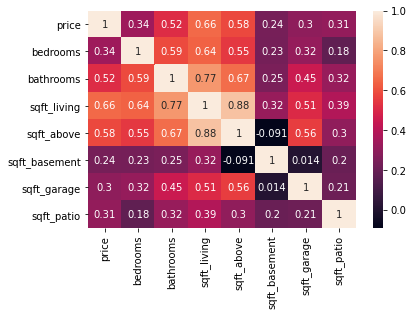

In [24]:
sns.heatmap(df_numeric.corr(), annot=True);

In [25]:
df_numeric_clean = df_numeric.drop(['bathrooms', 'sqft_above'], axis =1).copy()

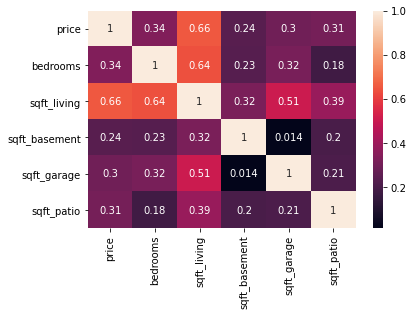

In [26]:
sns.heatmap(df_numeric_clean.corr(), annot=True);

## Baseline Multi-Linear Regression Model

Now that our data has been cleaned, we have our improved simple linear model, and we have dropped features that are highly correlated in an attempt to reduce multicollinearity, we can check our results using multi-linear regression. 

To compare the multi-linear regression models and find the absolute best fit, we use the function, `multi_num_model_all_combos`, found in the included .py file. This function runs a multi-linear regression model for all combinations of predictor features in a given dataframe against the specified target feature. 

We found that the combination of all 5 of the remaining predictor variables has the highest adjusted R-squared value (.447) and all coefficient p-values are statistically significant. We will be using these variables from now on as we move forward.

In [27]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric_clean, 'price')

The top three combos are: 
    - ['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4469276012627136 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'sqft_living', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4465074066411766, 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_patio'] 
    	- adj_r2: 0.44522348499911213, 
    	- ratio of p-vals <.05: 100.0


In [28]:
multi_df.head(15)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,30,"[bedrooms, sqft_living, sqft_basement, sqft_ga...",0.44702,0.446928,0,241952,0,100,355642,535528
1,27,"[bedrooms, sqft_living, sqft_garage, sqft_patio]",0.446581,0.446507,0,241978,0,100,356234,535740
2,26,"[bedrooms, sqft_living, sqft_basement, sqft_pa...",0.445298,0.445223,0,239794,0,100,357039,536361
3,25,"[bedrooms, sqft_living, sqft_basement, sqft_ga...",0.444733,0.444659,0,252157,0,100,356763,536634
4,17,"[bedrooms, sqft_living, sqft_patio]",0.444449,0.444393,0,239546,0,100,358028,536771
5,16,"[bedrooms, sqft_living, sqft_garage]",0.444062,0.444006,0,252751,0,100,357490,536958
6,15,"[bedrooms, sqft_living, sqft_basement]",0.44315,0.443094,0,249777,0,100,358191,537398
7,5,"[bedrooms, sqft_living]",0.442011,0.441974,0,250190,0,100,359404,537947
8,29,"[sqft_living, sqft_basement, sqft_garage, sqft...",0.436022,0.435947,0,36894.9,0,100,360579,540827
9,23,"[sqft_living, sqft_garage, sqft_patio]",0.435766,0.43571,0,38398.8,0,100,360934,540949


In [29]:
for i in range(3):
    print(multi_df['column'][i])

['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_patio']


In [30]:
y=df_numeric_clean['price']
X = df_numeric_clean[['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4838.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:07:51   Log-Likelihood:            -4.3723e+05
No. Observations:               29927   AIC:                         8.745e+05
Df Residuals:                   29921   BIC:                         8.745e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.42e+05   1.13e+04     21.432      0.000     2.2e+05    2.64e+05
bedrooms      -1.013e+05   4153.118    -24.394      0.000   -1.09e+05   -9.32e+04
sqft_living     561.7892      5.097    110.215      0.000     551.798     571.780
sqft_basement    28.4712      5.844      4.872      0.000      17.016      39.926
sqft_garage    -124.5086     12.897     -9.654      0.000    -149.788     -99.229
sqft_patio      155.9635     14.020     11.124      0.000     128.484     183.444
==============================================================================
Omnibus:                    14633.933   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196779.875
Skew:                           2.019   Prob(JB):                         0.00
Kurtosis:                      14.896   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results of model:
- Our model explains about 44.7% of the variance in our data
- Our models F-statistic is statatistically significant compared to our alpha of 0.05
- All coefficient are statistically significant when compared to our alpha of .05

Interpretations:
- For a house with no `bedrooms`, `sqft_living`, `sqft_basement`, `sqft_garage`, or `sqft_patio` we would expect the house to be valued about \\$242,000
- For each additional bedroom, we would expect the home to lose value of about \\$101,000
- For each additional 1 square foot in living space size, we would expect the house to gain about \\$561
- For each additional 1 square foot in basement size, we would expect the house to gain about \\$28
- For each additional 1 square foot in garage size, we would expect the house to lose about \\$125
- For each additional 1 square foot in patio size, we would expect the house to gain about \\$155

## Standardizing the Data to Determine Importance

Since our data includes variables of different scale, we need to standardize our model to determine importance. Once standardized, we can check the coefficients of our variables and the predictor with the highest coefficient is the one with the greatest impact to our home value.

After standardizing our dataset, we are able to see that `sqft_living` has the highest coefficient (.74) with the number of `bedrooms` coming in second (-.14).

In [31]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_standardized = df_numeric_clean.copy()


for col in df_standardized:
    df_standardized[col] = (df_standardized[col] - df_standardized[col].mean()) / df_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_standardized.describe()

,price,bedrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio
count,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04
mean,-1.025677e-16,-4.107458e-17,1.479160e-16,1.567007e-17,-4.416111e-17,2.279283e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.361774e+00,-3.492967e+00,-2.211649e+00,-8.272539e-01,-1.161801e+00,-8.924603e-01
25%,-6.038763e-01,-4.232822e-01,-7.209115e-01,-8.272539e-01,-1.161801e+00,-7.271875e-01
50%,-3.122780e-01,-4.232822e-01,-1.948926e-01,-8.272539e-01,2.465522e-01,-2.726875e-01
75%,2.986898e-01,5.999461e-01,5.310135e-01,8.155705e-01,6.338495e-01,3.966672e-01
max,8.206558e+00,9.809000e+00,1.394450e+01,7.072284e+00,1.144296e+01,1.716359e+01


In [32]:
y=df_standardized['price']
X = df_standardized[['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4838.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:07:51   Log-Likelihood:                -33599.
No. Observations:               29927   AIC:                         6.721e+04
Df Residuals:                   29921   BIC:                         6.726e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.801e-17      0.004  -2.28e-14      1.000      -0.008       0.008
bedrooms         -0.1375      0.006    -24.394      0.000      -0.149      -0.126
sqft_living       0.7415      0.007    110.215      0.000       0.728       0.755
sqft_basement     0.0226      0.005      4.872      0.000       0.014       0.032
sqft_garage      -0.0491      0.005     -9.654      0.000      -0.059      -0.039
sqft_patio        0.0524      0.005     11.124      0.000       0.043       0.062
==============================================================================
Omnibus:                    14633.933   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196779.875
Skew:                           2.019   Prob(JB):                         0.00
Kurtosis:                      14.896   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Partial Regression Plots for our Model

Now we can check partial regression plots for our model. The goal is to show the marginal contribution of each particular predictor. These models correlate with the slope of the coefficient in our standardized model. Those with a higher value for the absolute value of the slope have a larger impact on our modeling.

We can see that each plot shows a linear relationship with a non-zero slope meaning that it is beneficial to add each of these features to the model.

In [33]:
results.predict(sm.add_constant(X))

0       -0.804034
1        0.400997
2        0.294547
3        0.158657
4       -0.644992
           ...   
30150   -0.293764
30151    0.095863
30152   -0.310082
30153    0.380219
30154   -0.729029
Length: 29927, dtype: float64

In [34]:
# Keeping for now but take out before final report is due


# fig, ax = plt.subplots(figsize=(15,10))
# ax.scatter(df_numeric_clean['sqft_living'], df_numeric_clean['price']/1000000, 
#            alpha = .3, color='slategray')
# ax.plot(df_numeric_clean['sqft_living'], 
#         ((302*df_numeric_clean['sqft_living'])+181000)/1000000, color='black', 
#         linewidth=7, ls='--')
# ax.set_xlabel('Living Space Square Footage', size=12.5)
# ax.set_ylabel('Home Price (MM)', size=12.5)
# ax.set_title('Living Space Square Footage vs Home Price', size=20);
# # plt.savefig('SQ_FT vs Price.jpg', format='jpg')

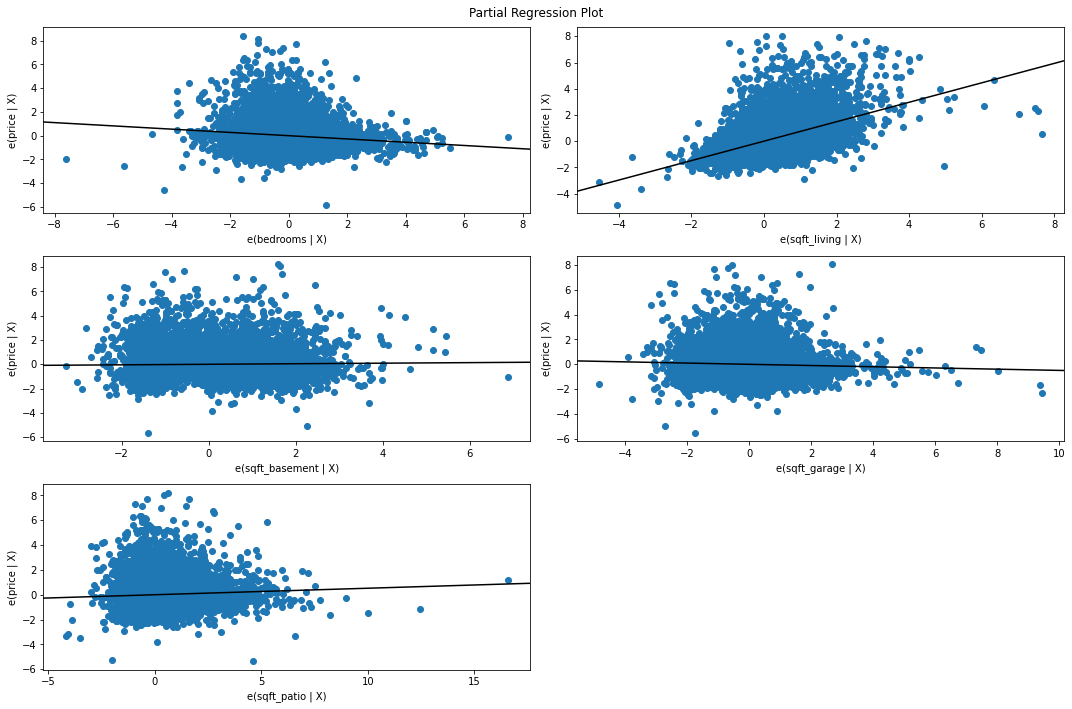

In [35]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results, 
                                  exog_idx=['bedrooms', 'sqft_living', 
                                            'sqft_basement', 'sqft_garage', 
                                            'sqft_patio'], fig=fig
                                 )
plt.tight_layout()
plt.show()

## Checking for Linearity and Normal Distributions

Now that our data is standardized, we also run a scattermatrix of the variables to get a better visual representation of what we're working with and to ensure that our data is as normal and linear as possible.

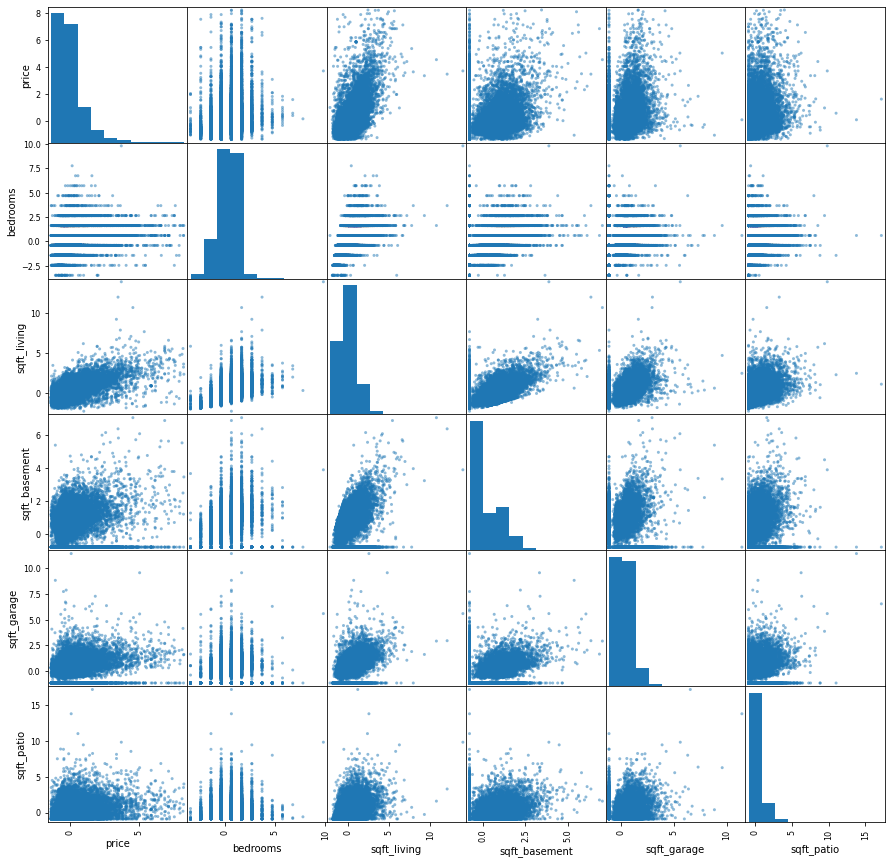

In [36]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_standardized,figsize  = [15, 15]);

### Logging all of the Predictor Variables

In an attempt to improve the linearity and normalcy of our dataset, we log all of our predictor values and run the scattermatrix to compare to our previously standardized data. 

Our data is much less linear than before scaling and we are unable to run our model for any of the predictor variables due to `NaN`s that appeared after taking the log of our predictor variables. This is not a good approach and we will not be prusuing this.

In [37]:
X_log = df_standardized.copy()
X_log = X_log.drop(['price'], axis=1)
X_log_dropped = X_log.copy()

for col in X_log_dropped:
    X_log_dropped[f'log({col})'] = np.log(X_log_dropped[col])
    X_log_dropped.drop([col], axis=1, inplace=True)

# Adding price back into newly logged dataframe
X_log_dropped['price'] = df_numeric_clean['price'].copy()
X_log_dropped

,log(bedrooms),log(sqft_living),log(sqft_basement),log(sqft_garage),log(sqft_patio),price
0,-0.510916,NaN,NaN,NaN,NaN,675000.0
1,0.484384,-0.357619,0.650559,NaN,-2.310857,920000.0
2,0.973201,-0.204489,0.659636,NaN,NaN,311000.0
3,NaN,-2.854294,0.041880,NaN,-1.499997,775000.0
4,NaN,NaN,-2.010116,-0.255299,NaN,592500.0
...,...,...,...,...,...,...
30150,0.484384,NaN,0.137700,NaN,NaN,1555000.0
30151,NaN,NaN,NaN,NaN,0.228000,1313000.0
30152,NaN,NaN,-0.247671,NaN,NaN,800000.0
30153,NaN,-0.715532,-0.763498,-0.638237,NaN,775000.0


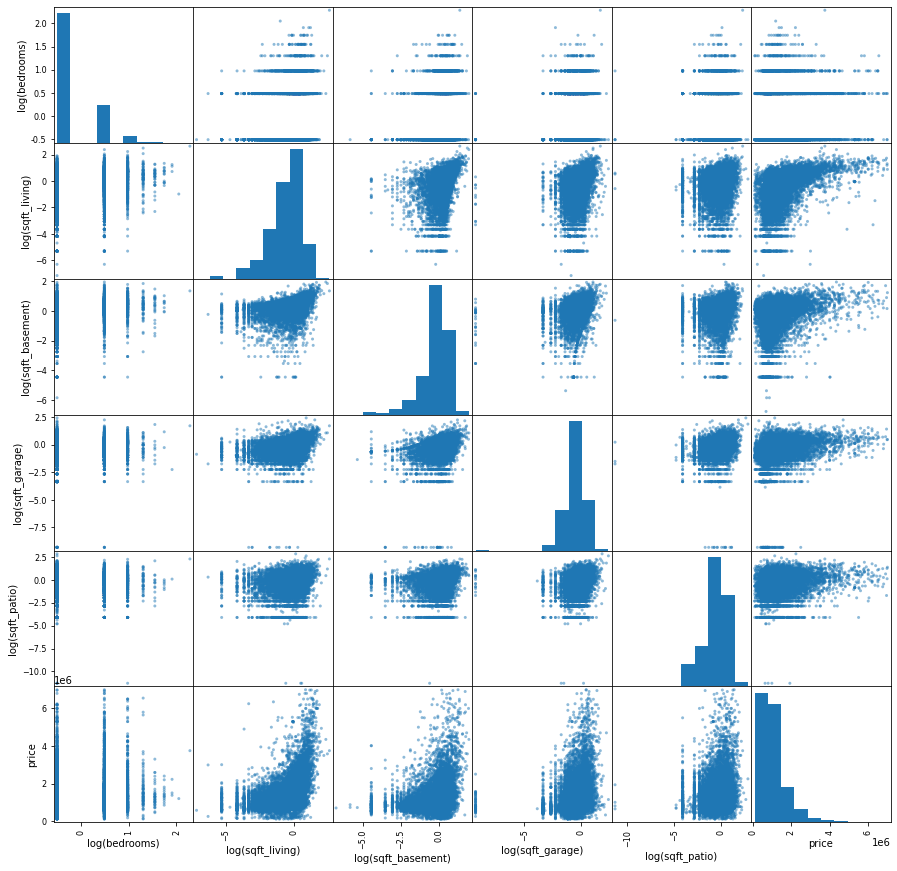

In [38]:
pd.plotting.scatter_matrix(X_log_dropped,figsize  = [15, 15]);

### Logging the Target Variable

Since we were not succesful when logging the predictor variables, we will take a look at changes to the relationship when we log-scale the target variable.

After logging our target varible, the simple-linear model had a worse R-squared value (.403) than our baseline model and the multi-linear model was unchanged from our baseline. As such, we will not pursue logging our target variable since it adds no value to our model.

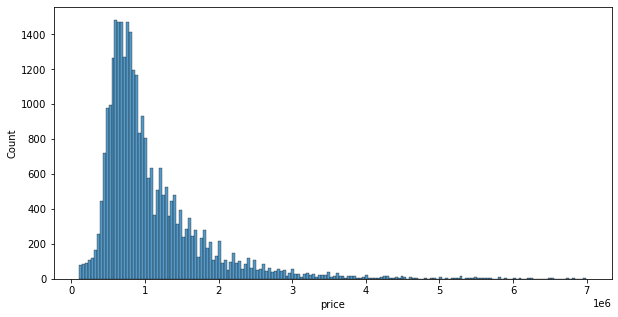

In [39]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df_numeric_clean['price'], bins = int(np.sqrt(len(df_numeric_clean['price']))));

In [40]:
y_log = np.log(df_numeric['price'])
X = df_numeric_clean[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:00   Log-Likelihood:                -16792.
No. Observations:               29927   AIC:                         3.359e+04
Df Residuals:                   29925   BIC:                         3.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9649      0.006   2176.234      0.000      12.953      12.977
sqft_living     0.0004   2.58e-06    142.111      0.000       0.000       0.000
==============================================================================
Omnibus:                     2324.497   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8890.917
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       5.590   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
y_log = np.log(df_numeric_clean['price'])
X = df_numeric_clean[['bedrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4838.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:00   Log-Likelihood:                -33599.
No. Observations:               29927   AIC:                         6.721e+04
Df Residuals:                   29921   BIC:                         6.726e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1705      0.016    -74.666      0.000      -1.201      -1.140
bedrooms         -0.1407      0.006    -24.394      0.000      -0.152      -0.129
sqft_living       0.0008   7.08e-06    110.215      0.000       0.001       0.001
sqft_basement  3.953e-05   8.12e-06      4.872      0.000    2.36e-05    5.54e-05
sqft_garage      -0.0002   1.79e-05     -9.654      0.000      -0.000      -0.000
sqft_patio        0.0002   1.95e-05     11.124      0.000       0.000       0.000
==============================================================================
Omnibus:                    14633.933   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196779.875
Skew:                           2.019   Prob(JB):                         0.00
Kurtosis:                      14.896   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# what if we try polynomial for all predictor variables?

In [42]:
# df_poly = df_numeric.drop(['price'], axis =1).copy()

In [43]:
# for col in df_poly:
#     df_poly[f"{col}^2"] = df_poly[col]**2

In [44]:
# df_numeric

In [45]:
# df_poly

In [46]:
# df_poly['price'] = df_numeric['price'].copy()

Testing Poly with all original columns still in_tact

In [47]:
# poly_results, _ = simple_test.multi_num_model_all_combos(df_poly, 'price')

In [48]:
# for i in range(15):
#     print(poly_results['column'][i])

We get a ton of overlap with squared and not squared, running again with just squared cols

In [49]:
# df_poly2 = df_poly.copy()

# for col in df_numeric:
#     df_poly2.drop([col], axis=1, inplace=True)
    
# df_poly2['price'] = df_numeric['price'].copy()

In [50]:
# poly_results2, _ = simple_test.multi_num_model_all_combos(df_poly2, 'price')

In [51]:
# poly_results2.head(15)

Results are less than the original, unsquared values

# Categorical Data

Now that we have a good baseline for our simple and multi-linear regressions when looking at just numerical data, we can take a look at our categorical data and model the results.

## Setting up the Categorical DataFrame

First, we set up a categorical dataframe to prepare all of our data for easy access through the analysis.

In [52]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [53]:
# adding numeric categories into cat df
df_cat['floors'] = df_dropped['floors'].copy()

In [54]:
df_cat.head()

,nuisance,condition,grade,heat_source,floors
0,NO,Good,7 Average,Gas,1.0
1,YES,Average,7 Average,Oil,1.0
2,NO,Average,7 Average,Gas,1.0
3,NO,Average,9 Better,Gas,2.0
4,YES,Average,7 Average,Electricity,2.0


What can be changed about each of the remaining?
- nuisance: improve sound damping in house (thicker insulation/windows) or install shrubs/large fence to mute noise
- condition (overall condition related to maintenance): paint house, do some landscaping
- heat_source: upgrade/change your heat source

## Lets start with the condition of the house

### Here's what the kings county website says:

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Need to have the target var in the dataframe to run the function

In [55]:
df_cat['price'] = df_dropped['price']
df_cat['sqft_living'] = df_dropped['sqft_living']

### Checking correlation between condition and price

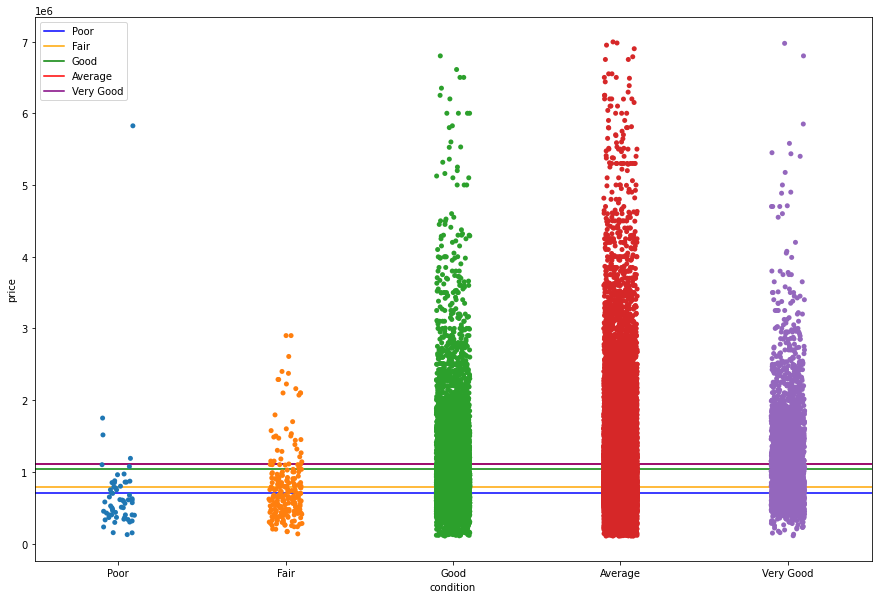

In [56]:
condition_stats, condition_results, condition_summary = simple_test.base_check_for_category(df_cat, 'condition')

In [57]:
condition_stats

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Average,18385.0,1.104130e+06,751012.883837,104186.0,658000.0,860000.0,1300000.0,6995000.0
Fair,224.0,7.955592e+05,505105.974750,135000.0,471000.0,668500.0,923125.0,2900000.0
Good,8017.0,1.040761e+06,660864.215882,104920.0,615000.0,855000.0,1285000.0,6800000.0
Poor,59.0,7.025151e+05,745984.429476,125000.0,400000.0,580000.0,795000.0,5825000.0
Very Good,3242.0,1.111885e+06,682508.479528,108758.0,650000.0,900500.0,1400000.0,6975000.0


In [58]:
condition_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     4542.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:01   Log-Likelihood:            -4.3765e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29921   BIC:                         8.754e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.073e+04   8254.337      2.512      0.012    4555.255    3.69e+04
sqft_living           498.5277      3.321    150.105      0.000     492.018     505.037
condition_Fair       1.889e+04   3.66e+04      0.517      0.605   -5.28e+04    9.06e+04
condition_Good       1.969e+04   7289.198      2.701      0.007    5400.152     3.4e+04
condition_Poor       3.124e+04   7.09e+04      0.441      0.659   -1.08e+05     1.7e+05
condition_Very Good  8.451e+04   1.04e+04      8.160      0.000    6.42e+04    1.05e+05
==============================================================================
Omnibus:                    15073.352   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202490.729
Skew:                           2.100   Prob(JB):                         0.00
Kurtosis:                      15.031   Cond. No.                     5.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lets try looking at nuisance

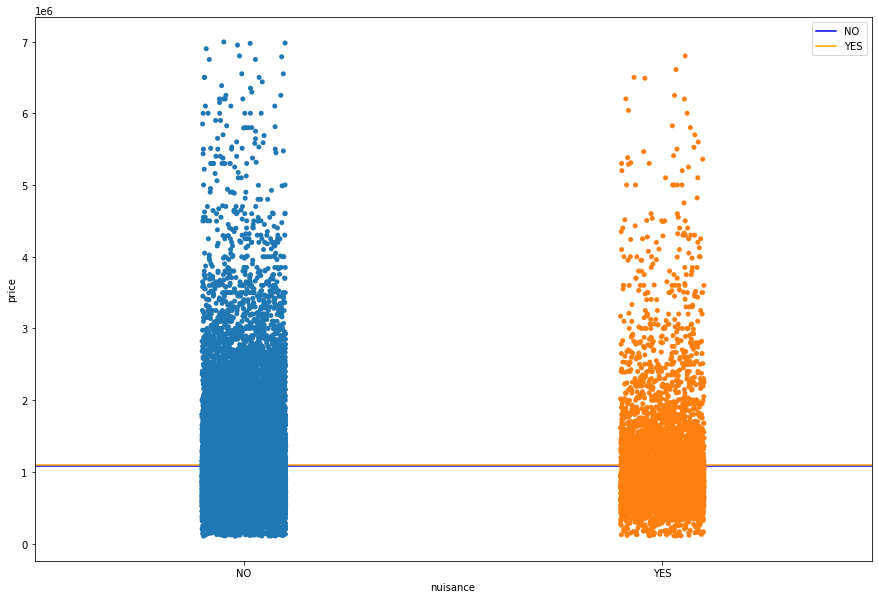

In [59]:
nuisance_stats, nuisance_results, nuisance_summary = simple_test.base_check_for_category(df_cat, 'nuisance')

In [60]:
nuisance_stats

,count,mean,std,min,25%,50%,75%,max
nuisance,,,,,,,,
NO,24736.0,1.083473e+06,708996.290375,104186.0,650000.0,862000.0,1300000.0,6995000.0
YES,5191.0,1.091659e+06,771224.184910,106088.0,650000.0,850000.0,1275000.0,6800000.0


In [61]:
nuisance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:01   Log-Likelihood:            -4.3763e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29924   BIC:                         8.753e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.936e+04   7849.523      2.466      0.014    3974.007    3.47e+04
sqft_living    499.0550      3.307    150.927      0.000     492.574     505.536
nuisance_YES  8.588e+04   8300.703     10.346      0.000    6.96e+04    1.02e+05
==============================================================================
Omnibus:                    14941.703   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197937.637
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      14.892   Cond. No.                     6.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OK, model is not much better and this is telling us that the price goes up based on having a nuisance so that doesnt look right

## Heatsource?

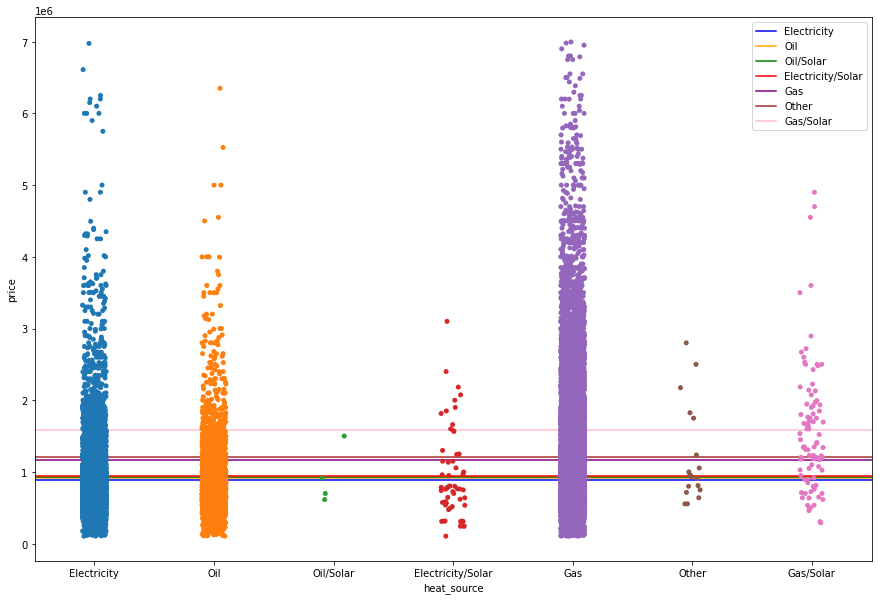

In [62]:
heat_stats, heat_results, heat_summary = simple_test.base_check_for_category(df_cat, 'heat_source')

In [63]:
heat_stats

,count,mean,std,min,25%,50%,75%,max
heat_source,,,,,,,,
Electricity,6419.0,8.891168e+05,565183.630323,104186.0,589900.00,750000.0,995700.00,6975000.0
Electricity/Solar,59.0,9.381008e+05,627059.661577,104920.0,526000.00,765000.0,1197500.00,3100000.0
Gas,20459.0,1.169025e+06,769020.328541,104725.0,675000.00,925000.0,1425000.00,6995000.0
Gas/Solar,90.0,1.585248e+06,909409.573458,290043.0,968104.25,1375000.0,1942576.75,4900000.0
Oil,2877.0,9.101851e+05,515491.372212,104946.0,605000.00,810000.0,1050000.00,6350000.0
Oil/Solar,4.0,9.321750e+05,398861.616562,615000.0,678750.00,806850.0,1060275.00,1500000.0
Other,19.0,1.205713e+06,672109.909835,555000.0,775000.00,950000.0,1493000.00,2800000.0


In [64]:
heat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3236.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:02   Log-Likelihood:            -4.3766e+05
No. Observations:               29927   AIC:                         8.753e+05
Df Residuals:                   29919   BIC:                         8.754e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.112e+04   9007.766      3.454      0.001    1.35e+04    4.88e+04
sqft_living                     498.2769      3.443    144.731      0.000     491.529     505.025
heat_source_Electricity/Solar -7.428e+04   7.11e+04     -1.045      0.296   -2.14e+05     6.5e+04
heat_source_Gas                 283.3043   8009.981      0.035      0.972   -1.54e+04     1.6e+04
heat_source_Gas/Solar          2.435e+05   5.78e+04      4.216      0.000     1.3e+05    3.57e+05
heat_source_Oil                4.027e+04   1.22e+04      3.303      0.001    1.64e+04    6.42e+04
heat_source_Oil/Solar         -2.698e+04   2.72e+05     -0.099      0.921    -5.6e+05    5.06e+05
heat_source_Other               2.04e+05   1.25e+05      1.634      0.102   -4.07e+04    4.49e+05
==============================================================================
Omnibus:                    15005.333   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200361.421
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                      14.967   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How about Grade?

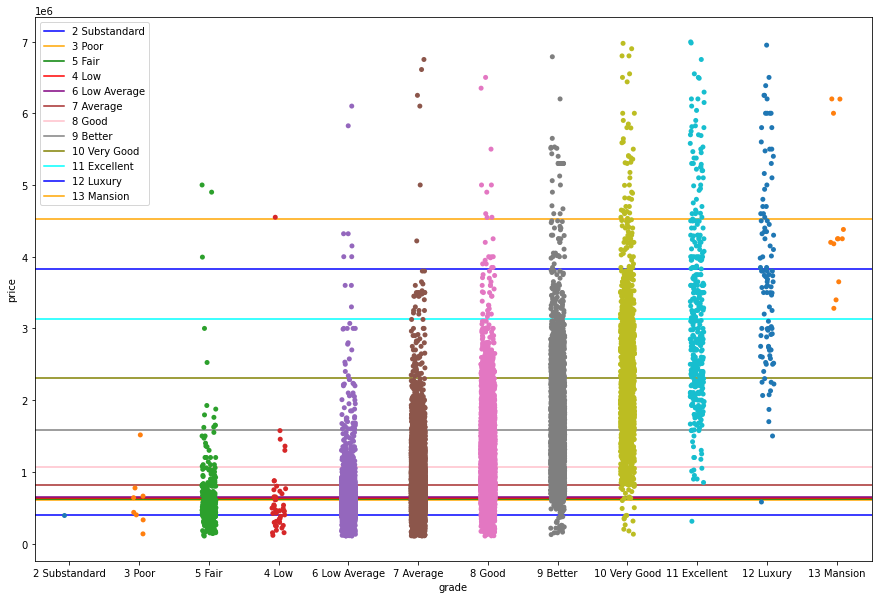

In [65]:
grade_stats, grade_results, grade_summary = simple_test.base_check_for_category(df_cat, 'grade')

In [66]:
grade_stats

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
10 Very Good,1357.0,2.311591e+06,9.809910e+05,131106.0,1690000.0,2177500.0,2800000.0,6975000.0
11 Excellent,382.0,3.138015e+06,1.243321e+06,310905.0,2242500.0,2850000.0,3850000.0,6995000.0
12 Luxury,104.0,3.826457e+06,1.293465e+06,580000.0,2848250.0,3702500.0,4600000.0,6950000.0
13 Mansion,12.0,4.519667e+06,1.037399e+06,3280000.0,4047500.0,4250000.0,4785000.0,6200000.0
2 Substandard,1.0,4.000000e+05,NaN,400000.0,400000.0,400000.0,400000.0,400000.0
3 Poor,8.0,6.115000e+05,4.189419e+05,135000.0,382500.0,537500.0,690250.0,1515000.0
4 Low,46.0,6.344368e+05,6.782346e+05,114491.0,316750.0,464000.0,684250.0,4550000.0
5 Fair,383.0,6.204781e+05,4.964090e+05,104975.0,400000.0,500000.0,699500.0,5000000.0
6 Low Average,2827.0,6.435828e+05,3.768254e+05,104946.0,460000.0,575000.0,725000.0,6100000.0


In [67]:
grade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     2658.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:03   Log-Likelihood:            -4.3524e+05
No. Observations:               29927   AIC:                         8.705e+05
Df Residuals:                   29914   BIC:                         8.706e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.235e+06   2.14e+04     57.654      0.000    1.19e+06    1.28e+06
sqft_living           289.6637      4.448     65.123      0.000     280.946     298.382
grade_11 Excellent   5.807e+05   2.93e+04     19.842      0.000    5.23e+05    6.38e+05
grade_12 Luxury      9.672e+05   5.17e+04     18.718      0.000    8.66e+05    1.07e+06
grade_13 Mansion     1.111e+06   1.46e+05      7.598      0.000    8.25e+05     1.4e+06
grade_2 Substandard -1.055e+06   5.01e+05     -2.103      0.035   -2.04e+06   -7.19e+04
grade_3 Poor        -8.454e+05   1.78e+05     -4.745      0.000   -1.19e+06   -4.96e+05
grade_4 Low         -7.826e+05   7.64e+04    -10.247      0.000   -9.32e+05   -6.33e+05
grade_5 Fair        -8.764e+05   3.16e+04    -27.754      0.000   -9.38e+05   -8.15e+05
grade_6 Low Average -9.428e+05   1.99e+04    -47.266      0.000   -9.82e+05   -9.04e+05
grade_7 Average      -9.13e+05   1.69e+04    -54.084      0.000   -9.46e+05    -8.8e+05
grade_8 Good        -8.045e+05    1.6e+04    -50.216      0.000   -8.36e+05   -7.73e+05
grade_9 Better       -4.88e+05   1.63e+04    -29.947      0.000    -5.2e+05   -4.56e+05
==============================================================================
Omnibus:                    15595.026   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255307.601
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      16.661   Cond. No.                     4.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now running categories along with multilinear regression

In [68]:
df_numeric_clean

,price,bedrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1180,0,0,40
1,920000.0,5,2770,1570,0,240
2,311000.0,6,2880,1580,0,0
3,775000.0,3,2160,1070,200,270
4,592500.0,2,1120,550,550,30
...,...,...,...,...,...,...
30150,1555000.0,5,1910,1130,0,210
30151,1313000.0,3,2020,0,0,520
30152,800000.0,3,1620,920,240,110
30153,775000.0,3,2570,740,480,100


In [69]:
df_best_nums = df_numeric_clean.copy()

In [70]:
df_best_nums['grade'] = df_cat['grade'].copy()

In [71]:
df_best_nums

,price,bedrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio,grade
0,675000.0,4,1180,0,0,40,7 Average
1,920000.0,5,2770,1570,0,240,7 Average
2,311000.0,6,2880,1580,0,0,7 Average
3,775000.0,3,2160,1070,200,270,9 Better
4,592500.0,2,1120,550,550,30,7 Average
...,...,...,...,...,...,...,...
30150,1555000.0,5,1910,1130,0,210,8 Good
30151,1313000.0,3,2020,0,0,520,7 Average
30152,800000.0,3,1620,920,240,110,7 Average
30153,775000.0,3,2570,740,480,100,8 Good


In [72]:
# setting up a model for all chosen numerical variables with the best categorical 
y = df_best_nums['price']
X_cat = pd.get_dummies(df_best_nums.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_2 Substandard'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2100.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:03   Log-Likelihood:            -4.3483e+05
No. Observations:               29927   AIC:                         8.697e+05
Df Residuals:                   29910   BIC:                         8.698e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.81e+05   4.94e+05      0.366      0.714   -7.88e+05    1.15e+06
bedrooms            -2.589e+04   4008.643     -6.459      0.000   -3.37e+04    -1.8e+04
sqft_living           302.0956      6.021     50.170      0.000     290.293     313.898
sqft_basement          87.0703      5.505     15.818      0.000      76.281      97.860
sqft_garage          -226.7592     12.209    -18.574      0.000    -250.689    -202.830
sqft_patio             76.2499     13.013      5.860      0.000      50.744     101.756
grade_10 Very Good   1.177e+06   4.95e+05      2.379      0.017    2.07e+05    2.15e+06
grade_11 Excellent   1.753e+06   4.95e+05      3.538      0.000    7.82e+05    2.72e+06
grade_12 Luxury      2.128e+06   4.97e+05      4.280      0.000    1.15e+06     3.1e+06
grade_13 Mansion     2.286e+06   5.15e+05      4.434      0.000    1.28e+06     3.3e+06
grade_3 Poor         2.434e+05   5.24e+05      0.464      0.643   -7.84e+05    1.27e+06
grade_4 Low          2.916e+05      5e+05      0.584      0.559   -6.88e+05    1.27e+06
grade_5 Fair         2.064e+05   4.95e+05      0.417      0.677   -7.64e+05    1.18e+06
grade_6 Low Average  1.505e+05   4.94e+05      0.304      0.761   -8.19e+05    1.12e+06
grade_7 Average      2.096e+05   4.94e+05      0.424      0.672   -7.59e+05    1.18e+06
grade_8 Good         3.368e+05   4.94e+05      0.681      0.496   -6.32e+05    1.31e+06
grade_9 Better       6.706e+05   4.95e+05      1.356      0.175   -2.99e+05    1.64e+06
==============================================================================
Omnibus:                    15626.507   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264930.900
Skew:                           2.123   Prob(JB):                         0.00
Kurtosis:                      16.944   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE and MAE

In [73]:
mean_absolute_error(y, cat_results.predict(sm.add_constant(X_cat)))

323542.30648863694

In [74]:
mean_squared_error(y, cat_results.predict(sm.add_constant(X_cat)))

244235057932.9165

# Standardizing numerical data and running again to help with interpretation

In [75]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_best_standardized = df_best_nums.copy()
df_best_standardized = df_best_standardized.drop(['grade'], axis=1)

for col in df_best_standardized:
    df_best_standardized[col] = (df_best_standardized[col] - df_best_standardized[col].mean()) / df_best_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_best_standardized.describe()

,price,bedrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio
count,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04,2.992700e+04
mean,-1.025677e-16,-4.107458e-17,1.479160e-16,1.567007e-17,-4.416111e-17,2.279283e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.361774e+00,-3.492967e+00,-2.211649e+00,-8.272539e-01,-1.161801e+00,-8.924603e-01
25%,-6.038763e-01,-4.232822e-01,-7.209115e-01,-8.272539e-01,-1.161801e+00,-7.271875e-01
50%,-3.122780e-01,-4.232822e-01,-1.948926e-01,-8.272539e-01,2.465522e-01,-2.726875e-01
75%,2.986898e-01,5.999461e-01,5.310135e-01,8.155705e-01,6.338495e-01,3.966672e-01
max,8.206558e+00,9.809000e+00,1.394450e+01,7.072284e+00,1.144296e+01,1.716359e+01


In [76]:
# setting up a model for all chosen numerical variables with the best categorical 
df_best_standardized['grade'] = df_best_nums['grade'].copy()

y = df_best_standardized['price']
X_cat = pd.get_dummies(df_best_standardized.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_2 Substandard'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2100.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:08:03   Log-Likelihood:                -31196.
No. Observations:               29927   AIC:                         6.243e+04
Df Residuals:                   29910   BIC:                         6.257e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5185      0.687     -0.755      0.450      -1.864       0.827
bedrooms               -0.0351      0.005     -6.459      0.000      -0.046      -0.024
sqft_living             0.3987      0.008     50.170      0.000       0.383       0.414
sqft_basement           0.0692      0.004     15.818      0.000       0.061       0.078
sqft_garage            -0.0894      0.005    -18.574      0.000      -0.099      -0.080
sqft_patio              0.0256      0.004      5.860      0.000       0.017       0.034
grade_10 Very Good      1.6344      0.687      2.379      0.017       0.288       2.981
grade_11 Excellent      2.4335      0.688      3.538      0.000       1.085       3.781
grade_12 Luxury         2.9552      0.690      4.280      0.000       1.602       4.308
grade_13 Mansion        3.1740      0.716      4.434      0.000       1.771       4.577
grade_3 Poor            0.3379      0.728      0.464      0.643      -1.089       1.765
grade_4 Low             0.4049      0.694      0.584      0.559      -0.955       1.765
grade_5 Fair            0.2865      0.687      0.417      0.677      -1.061       1.634
grade_6 Low Average     0.2090      0.687      0.304      0.761      -1.137       1.555
grade_7 Average         0.2911      0.687      0.424      0.672      -1.055       1.637
grade_8 Good            0.4676      0.687      0.681      0.496      -0.878       1.813
grade_9 Better          0.9311      0.687      1.356      0.175      -0.415       2.277
==============================================================================
Omnibus:                    15626.507   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264930.900
Skew:                           2.123   Prob(JB):                         0.00
Kurtosis:                      16.944   Cond. No.                         917.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results
- the model explains about 52.3% of the variance in the data overall
- the model is statistically significant
- p-values for all numeric feature coeficients are statistically significant
- p-values for 4 of the 11 grades are statistically significant
- The MAE for our final model came in at a variance of about $326,782 dollars



## Interpretation
- When looking at the standardized model, we see that sqft living and basement sq ft have the highest coef
    - This means that they will have the most drastic change to the model at scale and should be prioritized
    
- when we look at our regular model we can get some good interpretation taking everything else into consideration
    - given a substandard quality house with no bedrooms, no living sq ft, and no basement sqft, we would expect the house to be priced about \\$214,100
    - for every increase in bedroom by 1, we would expect the house value to drop by \\$28,320
    - for every increase in 1 square ft of living area, we would expect the house value to increase by about \\$281
    - for every increase in 1 square ft of basement area, we would expect the house value to increase by about \\$107

- We see statistically significant coefficients for building grade which represents the construction quality of improvements. We see that compared to a substandard home:
    - 'very good' quality improvements would increase home value by about \\$1,102,000
    - 'Excellent' quality improvements would increase home value by about \\$1,669,000
    - 'Luxury' quality improvements would increase home value by about \\$2,034,000
    - 'Mansion' quality improvements would increase home value by about\\$2,185,000

# Recommendations
- We recomment increasing the size of your home as the greatest impact to your renovation, first focusing on the total living area sq ft, then looking at basement area sq foot as a secondary (obviously this would be much more expensive then building above ground too)
- We recommend spending the extra dollars for quality craftsmanship as these pay off in the long run with vastly greater home values

# Here's the functions I made, saved outside of the .py file

### But first I save my model and plot

In [77]:
df_cat['millions'] = df_cat['price']/1000000

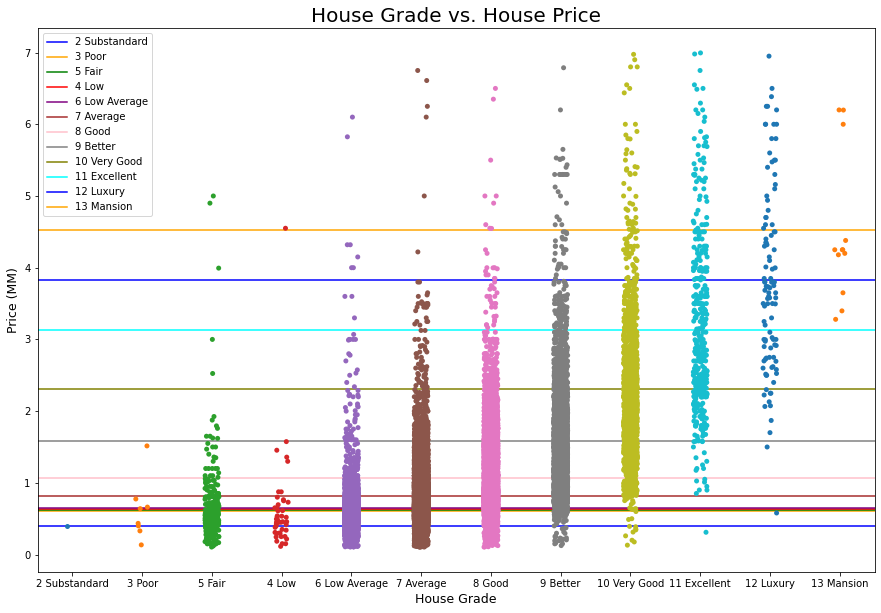

In [78]:
test_df = df_cat['grade'].sort_values().copy()
    
mean_list = []
for i in df_cat.groupby(['grade'])['millions'].mean().sort_values().index:
    mean_list.append(i)

fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(x=test_df, y=df_cat['millions'], order=mean_list, palette="tab10")

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
colors = colors *2
    
for i, category in enumerate(mean_list):
    ax.axhline(y=df_cat.groupby(['grade'])['millions'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
ax.set_ylabel('Price (MM)', size=12.5)
ax.set_xlabel('House Grade', size=12.5) 
ax.set_title('House Grade vs. House Price', size=20)
# ax.set_
ax.legend();

# # Model the category
# y = df_cat['price']
# X_cat = df_cat[['grade']].copy()
# # X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
# X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)
plt.savefig('grade_chart.jpg', format='jpg')

In [79]:
def simple_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run a linear regression 
    model for all columns against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob, const coef, predictor coef, const p-val and predictor p-val.
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: simple_num_model_all_combos(df_numeric, 'price')
    '''
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    predictor_coef = []
    const_p_val = []
    predictor_p_val =[]
    
    
    for col in df:
        if col != target_var:
            X = df[[col]]
            y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(col)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(model.params.values[0])
            predictor_coef.append(model.params.values[1])
            const_p_val.append(model.pvalues.values[0])
            predictor_p_val.append(model.pvalues.values[1])
        else:
            continue
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, predictor_coef, const_p_val, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'predictor_coef', 'const_p_val', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
            
    return output_df_transposed.sort_values('r2_adj', ascending=False)

In [80]:
def multi_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run all variations 
    of a linear regression model for each combination of features against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: multi_num_model_all_combos(df_numeric, 'price')
    '''
    
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    const_p_val = []

#     predictor_coef = []
#     predictor_p_val =[]
    
    list_of_combos = []
    p_value_good = []
    MAE = []
    RMSE = []
#     target_var = 'price'

    function_df = df.drop([target_var], axis=1).copy()
    for i, x in enumerate(function_df):
        list_of_combos.append(list(combinations(function_df, i+1)))
    
    for i in range(len(list_of_combos)):

        for combo in list_of_combos[i]:
            # created a temp list to hold each column name combination
            temp_list = []
            for x in combo:
                temp_list.append(x)
                X = function_df[temp_list]
                y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(temp_list)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(round(model.params.values[0], 4))
            const_p_val.append(round(model.pvalues.values[0], 4))
            good = 0
            for p in model.pvalues:
                total = len(model.pvalues)
                if p <= .05:
                    good += 1
            p_value_good.append((good/total)*100)
            MAE.append(mean_absolute_error(y, model.predict(sm.add_constant(X))))
            RMSE.append(mean_squared_error(y, model.predict(sm.add_constant(X)), squared=False))


#             if i == range(len(list_of_combos))[-1]:
#             for x in list_of_combos[i]:
#                 p_value_names.append(x)
                   
#             predictor_coef.append(model.params.values[1])
#             predictor_p_val.append(model.pvalues.values[1])
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, const_p_val, p_value_good, MAE, RMSE]
#                 , predictor_coef, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'const_p_val', '%p_val < .05', 'MAE', 'RMSE']
#                       , 'predictor_coef', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
    
    output_df_transposed = output_df_transposed.sort_values('r2_adj', ascending=False).reset_index()
    
    
    top_3 = f"The top three combos are: \n\
    - {output_df_transposed['column'][0]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][0]} \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][0]}\n\
    - {output_df_transposed['column'][1]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][1]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][1]}\n\
    - {output_df_transposed['column'][2]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][2]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][2]}"
    
    # trying to get p_values for all coefs into the df but this is hard and i'm gonna comment this out and stop
#     for x in p_value_names:
#         for name in x:
#             output_df_transposed[f"p_val {name}"] = np.nan
            
    return output_df_transposed, print(top_3)

In [81]:
def base_check_for_category(df, category_column):
    
    '''
    Input a dataframe and specify a target column from the dataframe. 
    The dataframe needs to have categorical information only.
    
    Output is a stripplot of the category, statistics on the avg home price 
    when grouped by the category column, and a one-hot encoded model with the 
    first col dropped.
    '''
    
# Check how the categories in the feature compare to the price distribution
    stats = df.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
#     temp_list = list(df[category_column].unique())
#     sorted_list = sorted(temp_list)
    test_df = df[category_column].sort_values()
    
    mean_list = []
    for i in df.groupby([category_column])['price'].mean().sort_values().index:
        mean_list.append(i)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=test_df, y=df['price'], order=mean_list, palette="tab10")

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(mean_list):
#         z = i+1
        ax.axhline(y=df.groupby([category_column])['price'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df['price']
    X_cat = df[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [82]:
def check_for_category_multi(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = X_standardized.copy()
    X_cat[category_column] = df_all_cat_reduced[[category_column]].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

# Looking at Garage

In [134]:
# Changing sqft_garage into boolean true false Yes Garage No Garage columns
g = 0


df_best_nums['Y_Garage'] = df_best_nums['sqft_garage'] > g

#define df2 as DataFrame where 'column_name' is < 20
df_best_nums['N_Garage'] = df_best_nums['sqft_garage'] <= g

In [135]:
df_best_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   sqft_living    29927 non-null  int64  
 3   sqft_basement  29927 non-null  int64  
 4   sqft_garage    29927 non-null  int64  
 5   sqft_patio     29927 non-null  int64  
 6   grade          29927 non-null  object 
 7   Y_Garage       29927 non-null  bool   
 8   N_Garage       29927 non-null  bool   
dtypes: bool(2), float64(1), int64(5), object(1)
memory usage: 3.1+ MB


In [139]:
# Changing the boolean True False into 0 and 1
df_best_nums = df_best_nums.copy()
df_best_nums = df_best_nums.astype({'N_Garage': int, 'Y_Garage': int})

In [140]:
df_best_nums

,price,bedrooms,sqft_living,sqft_basement,sqft_garage,sqft_patio,grade,Y_Garage,N_Garage
0,675000.0,4,1180,0,0,40,7 Average,0,1
1,920000.0,5,2770,1570,0,240,7 Average,0,1
2,311000.0,6,2880,1580,0,0,7 Average,0,1
3,775000.0,3,2160,1070,200,270,9 Better,1,0
4,592500.0,2,1120,550,550,30,7 Average,1,0
...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,1910,1130,0,210,8 Good,0,1
30151,1313000.0,3,2020,0,0,520,7 Average,0,1
30152,800000.0,3,1620,920,240,110,7 Average,1,0
30153,775000.0,3,2570,740,480,100,8 Good,1,0


In [146]:
# Modeling garage coefficients
y = df_best_nums['price']
X = df_best_nums[['N_Garage', 'sqft_basement', 'sqft_patio', 'sqft_living', 'sqft_garage']]

log_model = sm.OLS(y, sm.add_constant(X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     4657.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:30:23   Log-Likelihood:            -4.3748e+05
No. Observations:               29927   AIC:                         8.750e+05
Df Residuals:                   29921   BIC:                         8.750e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.697e+04    1.1e+04     -3.364      0.001   -5.85e+04   -1.54e+04
N_Garage       1.112e+05    1.2e+04      9.301      0.000    8.78e+04    1.35e+05
sqft_basement    26.7538      5.912      4.525      0.000      15.166      38.341
sqft_patio      172.0651     14.205     12.113      0.000     144.222     199.908
sqft_living     484.9023      4.354    111.359      0.000     476.367     493.437
sqft_garage      43.7053     22.163      1.972      0.049       0.265      87.146
==============================================================================
Omnibus:                    14866.773   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199811.422
Skew:                           2.062   Prob(JB):                         0.00
Kurtosis:                      14.968   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
N_G_mean = df_best_nums[df_best_nums['N_Garage']==1]['price'].mean()

In [127]:
Y_G_mean = df_best_nums[df_best_nums['Y_Garage']==1]['price'].mean()

In [128]:
#differences between houses with garage and no garage
Y_G_mean - N_G_mean 

215102.6001490706

# T-test Yes and No Garage Variables

In [130]:
Y_G_mean = df_best_nums[df_best_nums['Y_Garage']==1]['price'].mean()
Y_G_std = df_best_nums[df_best_nums['Y_Garage']==1]['price'].std()
Y_G_num = len(df_best_nums[df_best_nums['Y_Garage']==1]['price'])


N_G_mean = df_best_nums[df_best_nums['N_Garage']==1]['price'].mean()
N_G_std = df_best_nums[df_best_nums['N_Garage']==1]['price'].std()
N_G_num = len(df_best_nums[df_best_nums['N_Garage']==1]['price'])

In [131]:

stats.ttest_ind_from_stats(
    Y_G_mean,
    Y_G_std,
    Y_G_num,
    N_G_mean,
    N_G_std,
    N_G_num,
    equal_var=True
)

Ttest_indResult(statistic=24.55313316335337, pvalue=8.091309717684993e-132)

# Multicollinearity check using VIF

In [ ]:
#Setting up the formula for the vif formula with my desired independent variables
def calculate_vif(df_numerical):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df_numerical.columns
    for i in range(0, x_var_names.shape[0]):
        y = df_numerical[x_var_names[i]]
        x = df_numerical[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [ ]:
#Running the vif calculation
lm = sm.OLS(y, X).fit()
print("Coeffients: \n{0}".format(lm.params))
calculate_vif(X)

In [ ]:
#Looking at the VIF and coeffecients for sqft independents when variable is dropped
X.drop(['bathrooms'], axis=1, inplace=True)
lm = sm.OLS(y, X).fit()
print("Coeffients: \n{0}".format(lm.params))
calculate_vif(X)